# Exploración

Exploración realizada sobre un subcojunto de transacciones antes de ser procesado.

In [1]:
import pandas as pd
import numpy as np

In [2]:
tsx = pd.read_csv('../data/example_tsx.csv', sep=';')
contracts = pd.read_csv('../data/contracts100.csv', sep=';')

In [3]:
tsx['block_timestamp'] = pd.to_datetime(tsx['block_timestamp'])
tsx['signature'] = tsx['input'].map(lambda x: x[:10])

In [4]:
tsx.head()

,hash,to_address,input,block_timestamp,receipt_gas_used,signature
0,0x4ca8fe4ae3534e1240857b3df2683d0f80a19dcda2b8...,0xdac17f958d2ee523a2206206994597c13d831ec7,0xa9059cbb0000000000000000000000008cb8774685df...,2023-01-14 01:56:11+00:00,63209,0xa9059cbb
1,0x93f74c1aeec00c31097b09bbcb538a6acef4518e4e01...,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xa9059cbb000000000000000000000000070d89dd69e7...,2023-01-14 13:22:47+00:00,65625,0xa9059cbb
2,0x015c05a84f4b237c50fd78811089fee5c8790bbc85c7...,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x5ae401dc000000000000000000000000000000000000...,2023-01-14 11:20:59+00:00,326767,0x5ae401dc
3,0x4e8ddbbcc8100fdd9c26270c28b284e92342a1765c12...,0x44e94034afce2dd3cd5eb62528f239686fc8f162,0xfa2b068f0000000000000000000000003cf351c13c3d...,2023-01-14 19:44:35+00:00,126124,0xfa2b068f
4,0xf285a51807823cafa2ff9bb7e1c963b22da767f2de7a...,0x1111111254eeb25477b68fb85ed929f73a960582,0xf78dc253000000000000000000000000d9408f29026e...,2023-01-14 03:16:35+00:00,97357,0xf78dc253


In [5]:
tsx['receipt_gas_used'].describe()

count    2.800000e+04
mean     1.289594e+05
std      1.904388e+05
min      2.105500e+04
25%      4.616700e+04
50%      7.355900e+04
75%      1.590908e+05
max      8.905346e+06
Name: receipt_gas_used, dtype: float64

In [6]:
contracts.head()

,contract,abi,proxy_abi
0,0xdac17f958d2ee523a2206206994597c13d831ec7,"[{""constant"":True,""inputs"":[],""name"":""name"",""o...",NaN
1,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,"[{""inputs"":[{""components"":[{""internalType"":""ad...",NaN
2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,"[{""inputs"":[{""internalType"":""address"",""name"":""...",NaN
3,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,"[{""inputs"":[{""components"":[{""internalType"":""ad...",NaN
4,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,"[{""constant"":False,""inputs"":[{""name"":""newImple...","[{""anonymous"":False,""inputs"":[{""indexed"":True,..."


## Ejemplos consumo gas a lo largo del tiempo

In [7]:
grouped_contracts_signature = tsx.groupby(['to_address', 'signature'])

<Axes: xlabel='block_timestamp'>

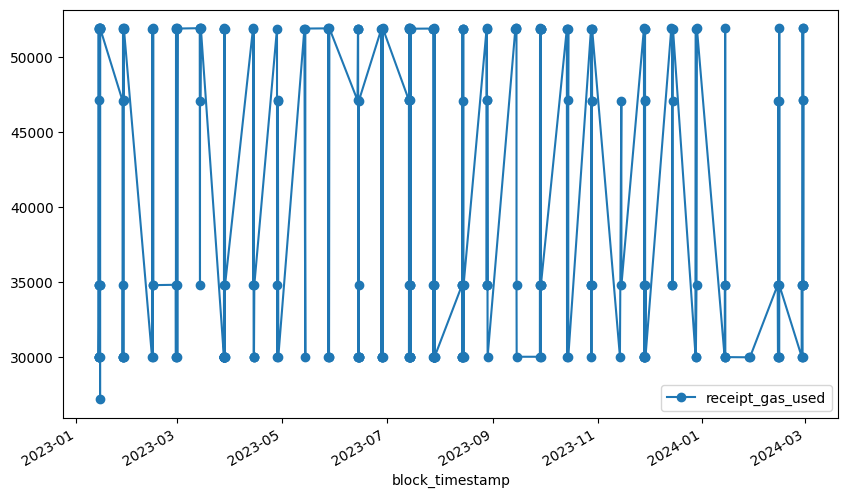

In [8]:
example = grouped_contracts_signature.get_group(('0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce', '0xa9059cbb'))
example = example.sort_values(by='block_timestamp')

example.plot(x='block_timestamp', y='receipt_gas_used', marker='o', linestyle='-', figsize=(10, 6))

<Axes: xlabel='block_timestamp'>

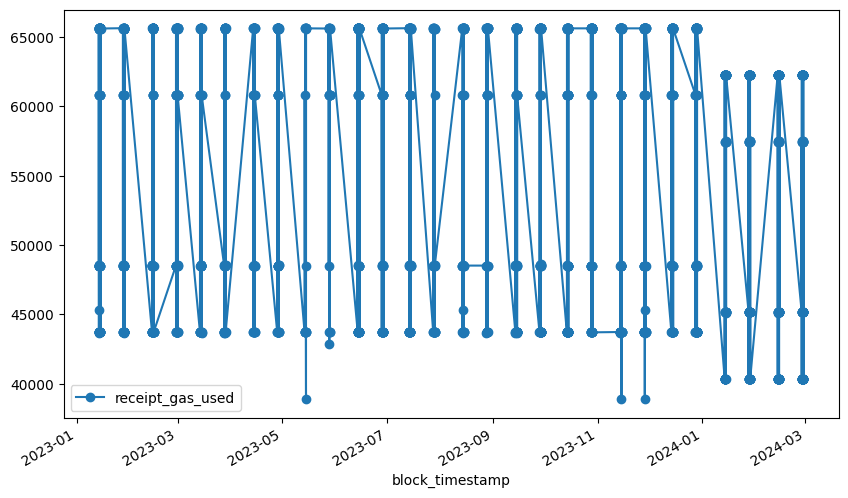

In [9]:
example = grouped_contracts_signature.get_group(('0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', '0xa9059cbb'))
example = example.sort_values(by='block_timestamp')

example.plot(x='block_timestamp', y='receipt_gas_used', marker='o', linestyle='-', figsize=(10, 6))

<Axes: xlabel='block_timestamp'>

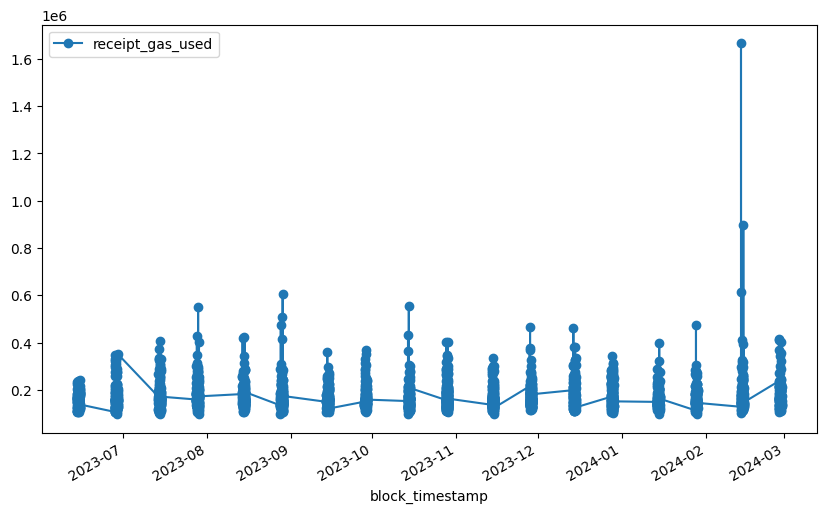

In [10]:
example = grouped_contracts_signature.get_group(('0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad', '0x3593564c'))
example = example.sort_values(by='block_timestamp')

example.plot(x='block_timestamp', y='receipt_gas_used', marker='o', linestyle='-', figsize=(10, 6))